## Energy Loss Corrections

Particles passing through the detector material loose energy as they travel. The track momentum is reconstructed by fitting a helical path to the track points left in the detector. For this procedure all particles are assumed to be pions and the reconstructed momentum is corrected by the amount of energy loss for a pion. Fitting the track points to an ideal helical track tends to underestimate the momentum due to these energy loss efects.

For kaons and protons ( or anything that is not a pion ) the amount of energy loss can be determined from simulated tracks run through GEANT. The average energy loss in each pT bin is fit to:  

E$_{Loss}$( p$_T$ ) = $a + b~p_T^{-c}$


This form does a good job of capturing the energy loss observed from the simulated and reconstructed tracks. Using this parameterization also helps smooth the fluctuations due to low statistics / noise.

Data from embedding sample pi/k/p in production_15GeV ( Run14 AuAu15 )

In [6]:
%run '../rootlib.ipynb'
from __future__ import print_function

In [2]:
#Positive plc's data files 
proton = root_open( "/Users/danielbrandenburg/bnl/local/data/BES/15GeV/embedding/P_0.root" )
piPlus = root_open( "/Users/danielbrandenburg/bnl/local/data/BES/15GeV/embedding/Pi_Plus_0.root")
kPlus = root_open( "/Users/danielbrandenburg/bnl/local/data/BES/15GeV/embedding/K_Plus_0.root" )

#Negative plc's data files
pbar = root_open( "/Users/danielbrandenburg/bnl/local/data/BES/15GeV/embedding/P_Bar_0.root" )
piMinus = root_open( "/Users/danielbrandenburg/bnl/local/data/BES/15GeV/embedding/Pi_Minus_0.root")
kMinus = root_open( "/Users/danielbrandenburg/bnl/local/data/BES/15GeV/embedding/K_Minus_0.root" )

<Pi_p>
	<EnergyLossParams formula="[0] + [1] * pow( x, -[2] )" p0="-0.00055070341104" p1="-0.000433250713219" p2="-7.1223112091"/>
</Pi_p>
<K_p>
	<EnergyLossParams formula="[0] + [1] * pow( x, -[2] )" p0="0.000502514167362" p1="-0.00109644106465" p2="1.78930918954"/>
</K_p>
<P_p>
	<EnergyLossParams formula="[0] + [1] * pow( x, -[2] )" p0="0.00754575777621" p1="-0.00909405139625" p2="1.22907159895"/>
</P_p>


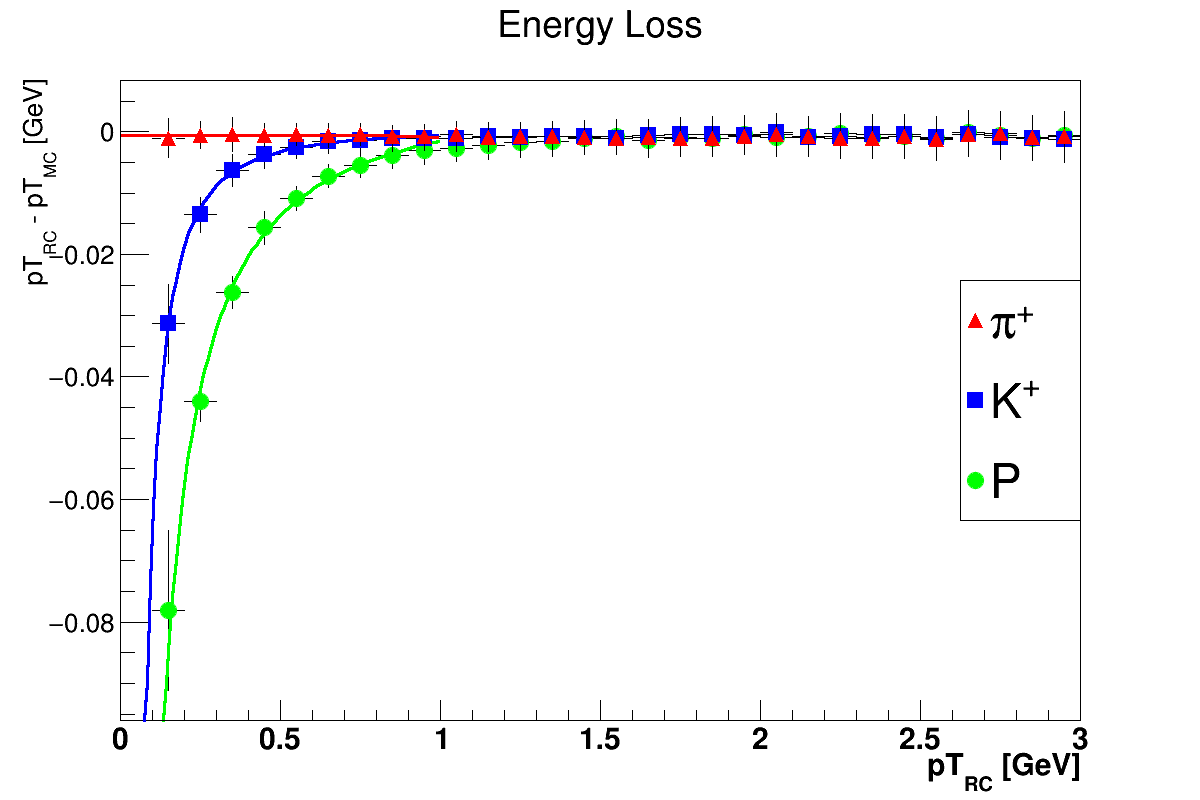

In [21]:
can = Canvas( width=1200, height=800 )
R.gStyle.SetOptStat( 0 )
R.gStyle.SetOptFit( 0 )

def fitEnergyLoss( df, plc, color, marker ) :
    el = df.energyLoss.ProfileX().Clone( plc+"_el" )
    el.GetXaxis().SetRangeUser( 0, 3 )
    el.GetYaxis().SetTitleOffset( 1.2 )
    el.GetXaxis().SetTitleOffset( 1.0 )
    elf = R.TF1( "elf"+ plc, "[0] + [1] * pow( x, -[2] )" )
    elf.SetLineColor( color )
    elf.SetLineWidth( 3 )
    el.SetMarkerColor( color )
    el.SetMarkerStyle( marker )
    el.SetMarkerSize( 2 )
    el.Fit( elf, "R" )    
    el.SetTitle( "Energy Loss;pT_{RC} [GeV]; pT_{RC} - pT_{MC} [GeV]" )
    print("<", plc, ">", sep='')
    print( "\t<EnergyLossParams ", end='' )
    print("formula=\"", "[0] + [1] * pow( x, -[2] )", "\"", sep='', end = '')
    print(" p0=", "\"", elf.GetParameters()[0], "\"", sep='', end = '' )
    print(" p1=", "\"", elf.GetParameters()[1], "\"", sep='', end = '' )
    print(" p2=", "\"", elf.GetParameters()[2], "\"", sep='', end = '' )
    print( "/>" )
    print("</", plc, ">", sep='' )
    return el

elPip = fitEnergyLoss( piPlus, "Pi_p", R.kRed, 22 )
elKp = fitEnergyLoss( kPlus, "K_p", R.kBlue, 21 )
elProton = fitEnergyLoss( proton, "P_p", R.kGreen, 20 )



leg = R.TLegend( 0.8, 0.35, 0.9, 0.65 )
leg.AddEntry( elPip, "#pi^{+}" )
leg.AddEntry( elKp, "K^{+}" )
leg.AddEntry( elProton, "P" )
elProton.Draw()
elKp.Draw("same")
elPip.Draw("same")
leg.Draw()
can.Print( "Energy_Loss_Positive.eps")
can

<Pi_n>
	<EnergyLossParams formula="[0] + [1] * pow( x, -[2] )" p0="-0.000537054157811" p1="-0.000609439129582" p2="-5.58488552447"/>
</Pi_n>
<K_n>
	<EnergyLossParams formula="[0] + [1] * pow( x, -[2] )" p0="0.000247976023444" p1="-0.00105223723102" p2="1.76834388901"/>
</K_n>
<P_n>
	<EnergyLossParams formula="[0] + [1] * pow( x, -[2] )" p0="0.00830616433307" p1="-0.00974236642589" p2="1.19042942043"/>
</P_n>


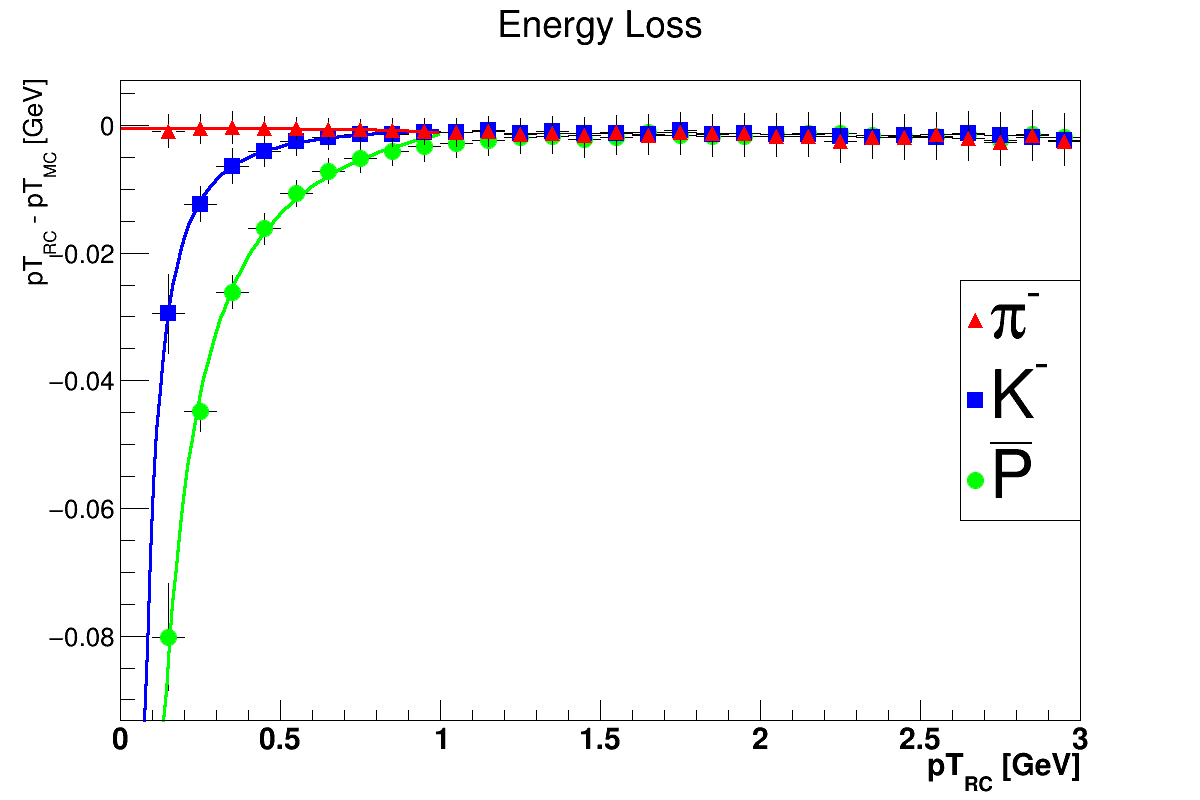

In [22]:
elPin = fitEnergyLoss( piMinus, "Pi_n", R.kRed, 22 )
elKn = fitEnergyLoss( kMinus, "K_n", R.kBlue, 21 )
elPbar = fitEnergyLoss( pbar, "P_n", R.kGreen, 20 )




leg = R.TLegend( 0.8, 0.35, 0.9, 0.65 )
leg.AddEntry( elPip, "#pi^{-}" )
leg.AddEntry( elKp, "K^{-}" )
leg.AddEntry( elProton, "#bar{P}" )
elPbar.Draw()
elKn.Draw("same")
elPin.Draw("same")
leg.Draw()
can.Print( "Energy_Loss_Negative.eps")
can